# Fandango's Movie Rating System
In October 2015, a data journalist named Walt Hickey analyzed movie ratings data and found strong evidence to suggest that Fandango's rating system was biased and dishonest (Fandango is an online movie ratings aggregator). He published his analysis in [this article](https://fivethirtyeight.com/features/fandango-movies-ratings/). 
Fandango displays a 5-star rating system on their website, where the minimum rating is 0 stars and the maximum is 5 stars.
Fandango was notified of their biased movie rating system which they later stated was caused by a bug in the system. My task is to determine whether there were any changes in Fandago's movie ratings in 2016. 
For this analysis, I'm going to use two datasets:
* First dataset is collected by Walt Hickey where he found biased in Fandango's ratings. From this dataset, I need the Fandango's ratings for movies released in 2015 
* Second dataset is collected by Dataquest employee. From this dataset, I have to isolate Fandango's ratings for movies released in 2016.

At the end of the project, I will find out whether there was any change in Fandango's movie ratings in 2016 after the company was notified of it dishonesty in 2015.


(c) Miradiz Rakhmatov

## Data Exploration:
Let's examine the datasets that we need for the analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.options.display.max_rows=250

### 1) Examine the data that Hickey had collected before making his analysis on fandango's scoring.

In [2]:
hickey_data = pd.read_csv('fandango_score_comparison.csv')
hickey_data.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [3]:
hickey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Fandango_Stars              146 non-null    float64
 7   Fandango_Ratingvalue        146 non-null    float64
 8   RT_norm                     146 non-null    float64
 9   RT_user_norm                146 non-null    float64
 10  Metacritic_norm             146 non-null    float64
 11  Metacritic_user_nom         146 non-null    float64
 12  IMDB_norm                   146 non-null    float64
 13  RT_norm_round               146 non

#### As you can see above, the dataset that Hickey collected has different sources of movie rankers beside Fandango which we have to eliminate for our analysis. Also, there are no null values in the dataset.

### 2) Examine the data that was collected for movies released in 2016-2017 (after Hickey's analysis)

In [4]:
ratings_16_17 = pd.read_csv('movie_ratings_16_17.csv')
ratings_16_17.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [5]:
ratings_16_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie         214 non-null    object 
 1   year          214 non-null    int64  
 2   metascore     214 non-null    int64  
 3   imdb          214 non-null    float64
 4   tmeter        214 non-null    int64  
 5   audience      214 non-null    int64  
 6   fandango      214 non-null    float64
 7   n_metascore   214 non-null    float64
 8   n_imdb        214 non-null    float64
 9   n_tmeter      214 non-null    float64
 10  n_audience    214 non-null    float64
 11  nr_metascore  214 non-null    float64
 12  nr_imdb       214 non-null    float64
 13  nr_tmeter     214 non-null    float64
 14  nr_audience   214 non-null    float64
dtypes: float64(10), int64(4), object(1)
memory usage: 25.2+ KB


#### From examining the above dataset, we can tell that there are no null values in the dataset. Similar to Hickey's data, the above dataset has different sources beside Fandango. We have to isolate the data relevent to Fandango. 

## Data Cleaning:

### 1) Clean the first dataset

In [6]:
## Here I'm going to extract the columns that are related to Fandango's ranking system 
fandango_columns = list()
fandango_columns.append('FILM')

for i in hickey_data.columns:
    if "Fandango" in i:
        fandango_columns.append(i)
fandango = hickey_data[fandango_columns].copy()
fandango.head(5)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [7]:
## After thoroughly examining the data I found out that there are two years (2014 and 2015) in Hickey's dataset
fandango.loc[7, 'FILM']

'Top Five (2014)'

In [8]:
## I'm going to create a table where I specify the year of the movie 
## This way I will be able to isolate the movies that were released in 2015

fandango['year'] = fandango['FILM'].map(lambda x: 2015 if '2015' in x else 2014)

## fandango['year'] = fandango['FILM'].str[-5:-1] another way by using string manipulation

In [9]:
fandango.head(5)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015


In [10]:
## Isolate the rows that have movies released in 2015
fandango_15 = fandango[fandango['year'] == 2015]

## Reset the indexes 
fandango_15 = fandango_15.reset_index(drop=True)

## Drop the column 'year' which I created earlier (not needed anmore)
fandango_15 = fandango_15.drop(columns='year')

In [11]:
fandango_15.head(5)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


### 2) Clean the second dataset

In [12]:
## Isolate the columns related to Fandango 
fandango_16_17 = ratings_16_17[['movie', 'year', 'fandango']].copy()
fandango_16_17.head(5)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


In [13]:
## Since this dataset has the 'year' column, I'm going to isolate the rows with movies released in 2016
fandango_16 = fandango_16_17[fandango_16_17['year'] == 2016]

## Reset index
fandango_16 = fandango_16.reset_index(drop=True)

In [14]:
fandango_16.head(5)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Hologram for the King,2016,3.0
4,A Monster Calls,2016,4.0


# Analysis:
#### Now that our datasets are cleaned, we can proceed with answering the main question. 

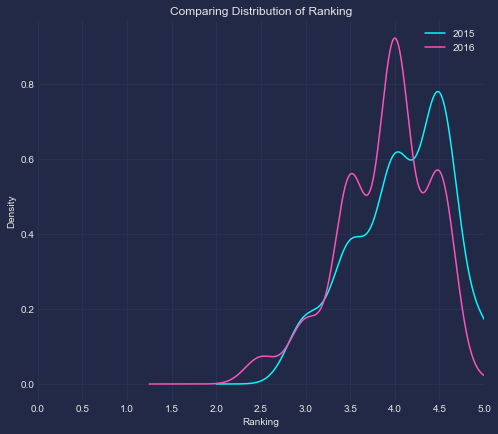

In [15]:
import mplcyberpunk
plt.style.use("cyberpunk")
fandango_15['Fandango_Stars'].plot.kde(label='2015', legend=True, figsize=(8,7))
fandango_16['fandango'].plot.kde(label='2016', legend=True)
plt.xlabel('Ranking')
plt.xlim(0,5)
plt.xticks(np.arange(0, 5.1, 0.5))
plt.title('Comparing Distribution of Ranking')
plt.show()

## Findings: 
From the kernal density graph above, we can tell that distribution is left skewed. Since there is a shift towards left in distribution of ranks in 2016, we can tell that Fandongo changed its ranking system by assigning less high ranks. To get more specific, we have to compare both of the figure by ranks in a bar chart.

### Let's look at distribution of each rank with proportion:

In [16]:
fandango_15['Fandango_Stars'].value_counts(normalize=True).sort_index(ascending=False)

5.0    0.069767
4.5    0.379845
4.0    0.286822
3.5    0.178295
3.0    0.085271
Name: Fandango_Stars, dtype: float64

In [17]:
fandango_16['fandango'].value_counts(normalize=True).sort_index(ascending=False)

5.0    0.005236
4.5    0.246073
4.0    0.403141
3.5    0.240838
3.0    0.073298
2.5    0.031414
Name: fandango, dtype: float64

#### It would be better to plot a bar chart to have a side by side comparison:
If we look at the values in ranks from both of the years, we can tell that dataset with movies released in 2015 doesn't have 2.5 rank. In order to plot a bar chart side by side, I will add 2.5 rank with 0 frequency in 2015 dataset. This will make both of the frequency datasets have the same amount of rows.

In [18]:
## Create DataFrame from 2015 distribution dataset by resetting indexes
f15 = (fandango_15['Fandango_Stars'].value_counts(normalize=True)*100).reset_index()

## Rename columns for better referencing
f15 = f15.rename(columns={'index': 'Rank', 'Fandango_Stars': 'Percentage'})

## Add 2.5 rank with 0 value to match columns in the distribution dataset of 2016
f15 = f15.append(pd.DataFrame([[2.5, 0]], columns=['Rank', 'Percentage']), ignore_index=True).sort_values('Rank')

## Sort the values by 'Rank' in ascending order
f15 = f15.sort_values('Rank')
f15

,Rank,Percentage
5,2.5,0.000000
3,3.0,8.527132
2,3.5,17.829457
1,4.0,28.682171
0,4.5,37.984496
4,5.0,6.976744


In [19]:
## Create DataFrame from 2016 distribution dataset by resetting indexes
f16 = (fandango_16['fandango'].value_counts(normalize=True)*100).reset_index()

## Rename columns for better referencing
f16 = f16.rename(columns={'index': 'Rank', 'fandango': 'Percentage'})

## Sort the values by 'Rank' in ascending order
f16 = f16.sort_values('Rank')
f16

,Rank,Percentage
4,2.5,3.141361
3,3.0,7.329843
2,3.5,24.083770
0,4.0,40.314136
1,4.5,24.607330
5,5.0,0.523560


In [20]:
## Number of movies (released in 2016) with 5.0 stars 
(fandango_16['fandango'] == 5.0).value_counts()

False    190
True       1
Name: fandango, dtype: int64

In [21]:
## Number of movies (released in 2015) with 5.0 stars 
(fandango_15['Fandango_Stars'] == 5.0).value_counts()

False    120
True       9
Name: Fandango_Stars, dtype: int64

### Plot a bar chart with the both of the datasets side-by-side:

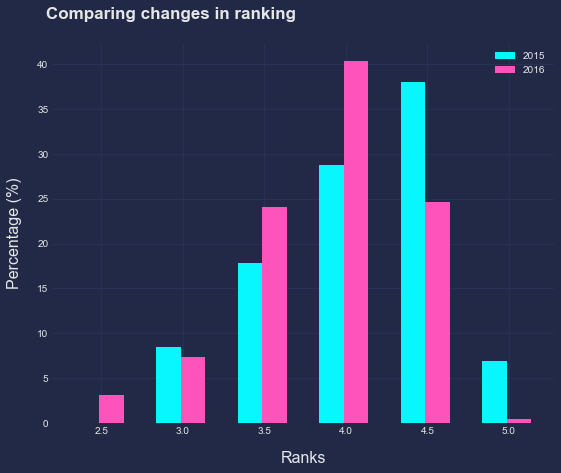

In [22]:
fig, ax = plt.subplots(figsize=(9, 7))
x = np.arange(6) ## Number of unique values in 'Rank' column (2015 and 2016 datasets)

ax.bar(x, f15['Percentage'], width=0.30, label='2015')
ax.bar(x+0.30, f16['Percentage'], width= 0.30, label='2016')

ax.set_xticks(x + 0.35 / 2)                        
ax.set_xticklabels(f16['Rank'].unique()) ## label the xticks with values in Rank column
ax.legend()
ax.set_xlabel('Ranks', labelpad=15, size=16)
ax.set_ylabel('Percentage (%)', labelpad=15, size=16)
ax.text(x=-0.5, y=45, s='Comparing changes in ranking', size=17, weight='bold')
plt.show()

## Findings:

Fandango had significantly less 4.5 and 5.0 stars in 2016. This means that Fandango was ranking movies more strictly (unbiasedly) than it was in 2015. Alternatively, majority of frequency among ranks can be seen in 4.0 stars for the movies ranked in 2016. Specifically, in 2016 the most popular rank was 4.0 which means that most of the movies were ranked 4.0 whereas in 2015 most of the movies were ranked 4.5. Also, Fandango almost didn't rank movies with 5 stars since the popularity for that rank was less than 1% in 2016 (1 movie with 5 stars).

### Let's look at mean, median and mode of ranks for both years:

I will create a DataFrame with indexes (mean, median and mode) and year columns with the values corresponding to each year.

In [23]:
mean_15 = fandango_15['Fandango_Stars'].mean()
med_15 = fandango_15['Fandango_Stars'].median()
mode_15 = fandango_15['Fandango_Stars'].mode()[0] ## result is pd.Series

In [24]:
mean_16 = fandango_16['fandango'].mean()
med_16 = fandango_16['fandango'].median()
mode_16 = fandango_16['fandango'].mode()[0] ## result is pd.Series 

In [25]:
data = {'2015':[mean_15, med_15, mode_15],
        '2016':[mean_16, med_16, mode_16]}
mmm = pd.DataFrame(data, index =['Mean', 'Median', 'Mode'])

In [26]:
## Difference (%) in avarage ranks in two years 
(mmm.iloc[0,0] - mmm.iloc[0,1])/mmm.iloc[0,0]*100

4.842683568951993

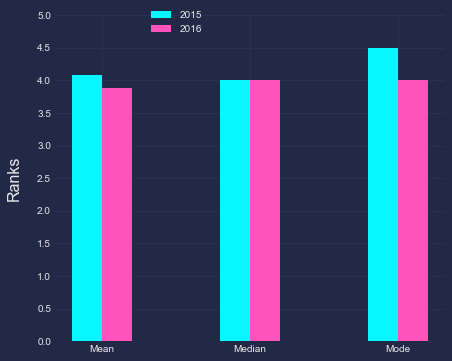

In [27]:
fig, ax = plt.subplots(figsize=(7, 6))
x = np.arange(3) ## Number of unique values in 'Rank' column (2015 and 2016 datasets)

ax.bar(x, mmm['2015'], width=0.20, label='2015')
ax.bar(x+0.20, mmm['2016'], width= 0.20, label='2016')

ax.set_xticks(x + 0.20 / 2)                        
ax.set_xticklabels(mmm.index) ## label the xticks with values in Rank column
ax.legend()
plt.legend(bbox_to_anchor=(0.4, 1.04), ncol=1)
ax.set_yticks(np.arange(0, 5.1, 0.5))
ax.set_ylabel('Ranks', labelpad=15, size=16)
plt.show()

## Findings:

A slight difference can be seen when comparing two years:
* The most frequent rank in 2015 was 4.5 whereas 4.0 star was the most popular among ranks in 2016.
* There is about 5% difference in avarange ranks in two years. In 2016, avarage star among ranks was about 3.9
* Both years have the same median

# To conclude:
There is a slight difference in Fandango's 2016 ranking system:
1. Star 5 was almost non-existent being assigned to just one movie
2. The most frequent (mode) rank shifted from 4.5 to 4.0 in 2016
3. Some movies were ranked with 2.5 stars which didn't happen in 2015 (zero 2.5 stars)